## <a name="data_collection">Data Preprocessing</a>

#### <a name="import_libraries">Import Libraries</a>



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import floor,ceil
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
pip install scikit-plot

In [ ]:
from scipy import stats
import scikitplot as skplt
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score


import warnings
warnings.simplefilter('ignore', DeprecationWarning)

### <a name="import-data">Import Data</a>

#Labelling the Dataset

The code reads data from a CSV file and performs column renaming for better clarity.

Mapping dictionaries are provided for categorical columns to make the data more interpretable.

In [ ]:
df=pd.read_csv("/content/Economic_Growth_Trend.csv")

headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Risk"]

df.columns=headers
df.to_csv("german_data_credit_cat.csv",index=False)

# Mapping dictionaries

status_checking_account = {
    'A14': "no checking account",
    'A11': "<0 DM",
    'A12': "0 <= <200 DM",
    'A13': ">= 200 DM"
}

credit_history = {
    "A34": "critical account",
    "A33": "delay in paying off",
    "A32": "existing credits paid back duly till now",
    "A31": "all credits at this bank paid back duly",
    "A30": "no credits taken"
}

purpose = {
    "A40": "car (new)",
    "A41": "car (used)",
    "A42": "furniture/equipment",
    "A43": "radio/television",
    "A44": "domestic appliances",
    "A45": "repairs",
    "A46": "education",
    'A47': 'vacation',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}

saving_account = {
    "A65": "no savings account",
    "A61": "<100 DM",
    "A62": "100 <= <500 DM",
    "A63": "500 <= < 1000 DM",
    "A64": ">= 1000 DM"
}

present_employment = {
    'A75': ">=7 years",
    'A74': "4<= <7 years",
    'A73': "1<= < 4 years",
    'A72': "<1 years",
    'A71': "unemployed"
}

personal_status_sex = {
    'A95': "female:single",
    'A94': "male:married/widowed",
    'A93': "male:single",
    'A92': "female:divorced/separated/married",
    'A91': "male:divorced/separated"
}

other_debtors_guarantors = {
    'A101': "none",
    'A102': "co-applicant",
    'A103': "guarantor"
}

property_mapping = {
    'A121': "real estate",
    'A122': "savings agreement/life insurance",
    'A123': "car or other",
    'A124': "unknown / no property"
}

other_installment_plans = {
    'A143': "none",
    'A142': "store",
    'A141': "bank"
}

housing = {
    'A153': "for free",
    'A152': "own",
    'A151': "rent"
}

job = {
    'A174': "management/ highly qualified employee",
    'A173': "skilled employee / official",
    'A172': "unskilled - resident",
    'A171': "unemployed/ unskilled  - non-resident"
}

telephone = {
    'A192': "yes",
    'A191': "none"
}

foreign_worker = {
    'A201': "yes",
    'A202': "no"
}

risk_mapping = {
    1: "Good Risk",
    2: "Bad Risk"
}

# Applying mappings to DataFrame columns

df["Status of existing checking account"] = df["Status of existing checking account"].map(status_checking_account)
df["Credit history"] = df["Credit history"].map(credit_history)
df["Purpose"] = df["Purpose"].map(purpose)
df["Savings account/bonds"] = df["Savings account/bonds"].map(saving_account)
df["Present employment since"] = df["Present employment since"].map(present_employment)
df["Personal status and sex"] = df["Personal status and sex"].map(personal_status_sex)
df["Other debtors / guarantors"] = df["Other debtors / guarantors"].map(other_debtors_guarantors)
df["Property"] = df["Property"].map(property_mapping)
df["Other installment plans"] = df["Other installment plans"].map(other_installment_plans)
df["Housing"] = df["Housing"].map(housing)
df["Job"] = df["Job"].map(job)
df["Telephone"] = df["Telephone"].map(telephone)
df["foreign worker"] = df["foreign worker"].map(foreign_worker)
df["Risk"] = df["Risk"].map(risk_mapping)

## <a name="data_overview">Data Overview</a>

In [ ]:
df.head() #top 5 rows of the dataset

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
0,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
1,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
2,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
3,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk
4,no checking account,36,existing credits paid back duly till now,education,9055,no savings account,1<= < 4 years,2,male:single,none,4,unknown / no property,35,none,for free,1,unskilled - resident,2,yes,yes,Good Risk


### <a name="data-types">Data Info</a>

In [ ]:
df.info() #information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       999 non-null    object
 1   Duration in month                                         999 non-null    int64 
 2   Credit history                                            999 non-null    object
 3   Purpose                                                   999 non-null    object
 4   Credit amount                                             999 non-null    int64 
 5   Savings account/bonds                                     999 non-null    object
 6   Present employment since                                  999 non-null    object
 7   Installment rate in percentage of disposable income       999 non-null    int64 
 8   Personal status and sex       

The dataset contains 999 entries with 21 attributes, a mix of categorical (14) and numerical (7) data. Key attributes include "Credit amount," "Duration in month," and "Age in years." "Risk" serves as the target variable, showcasing risk categorization as "Good Risk" or "Bad Risk." It's evident that categorical attributes hold various statuses like "Status of existing checking account," "Credit history," among others. Numerical attributes capture values such as installment rates, residence duration, and credit counts.

#Since all values are non-null, we are not replacing them with any mean or median values.


## <a name="summary_statistics">Table of Summary statistics</a>

### <a name="categorical-variable-stats">Categorical Variable</a>

#### Levels and Proportions

In [ ]:
column_names=df.columns.tolist()
column_names.remove("Credit amount") #numerical variable
column_names.remove("Age in years") #numerical variable
column_names.remove("Duration in month") #numerical variable
#----------------------------------------------------------------------------------------

column_names_cat={}
for name in column_names:
    column_names_cat[name]=len(df[name].unique().tolist())

marginal_report_cluster={}
for itr in range(0,np.asarray(list(column_names_cat.values())).max()+1):
    if [k for k,v in column_names_cat.items() if v == itr]:
        marginal_report_cluster[itr]=[k for k,v in column_names_cat.items() if v == itr]

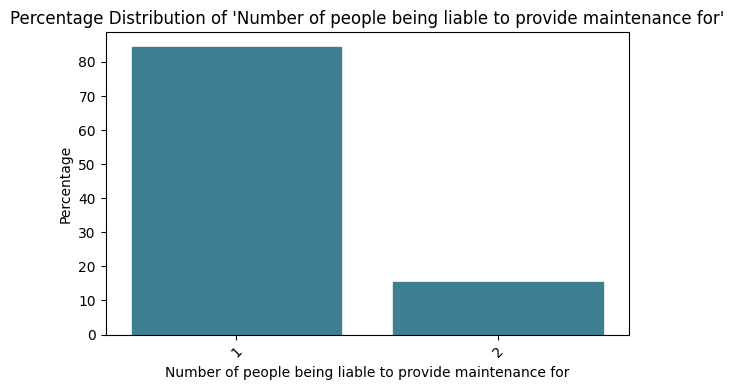

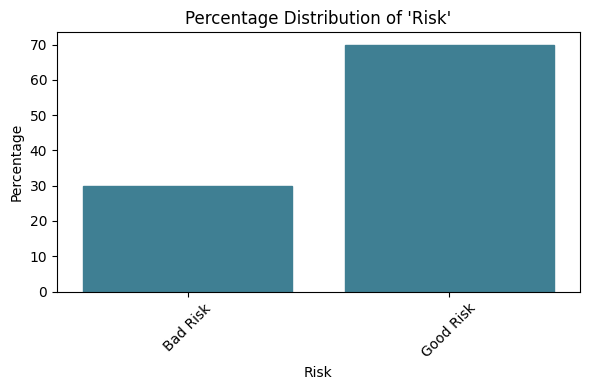

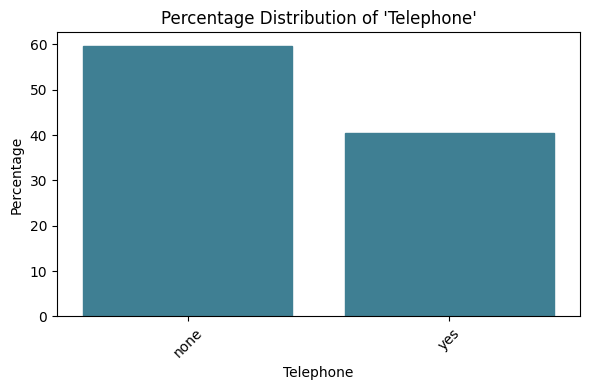

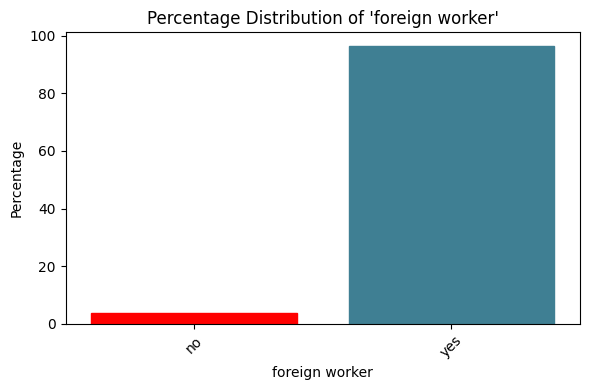

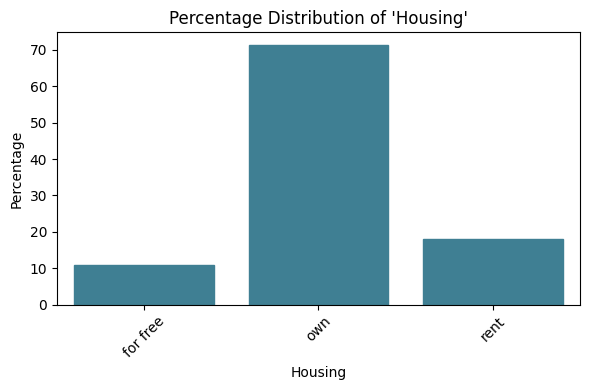

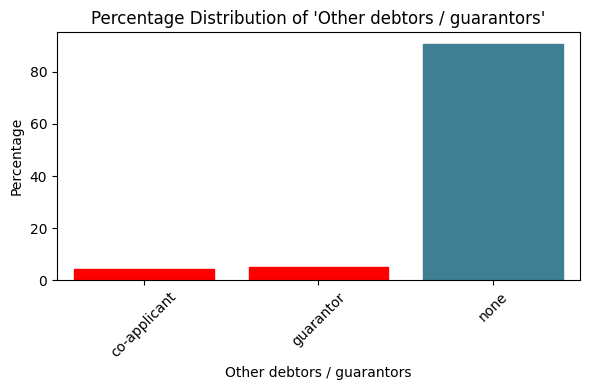

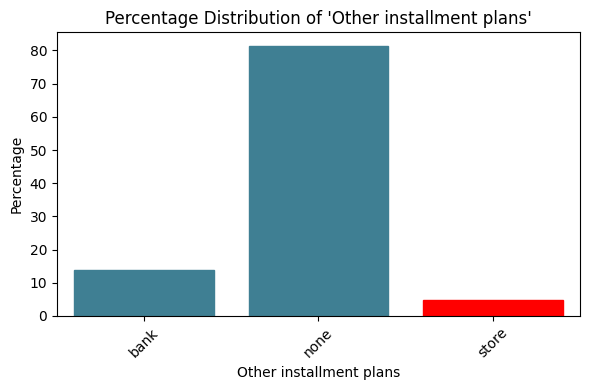

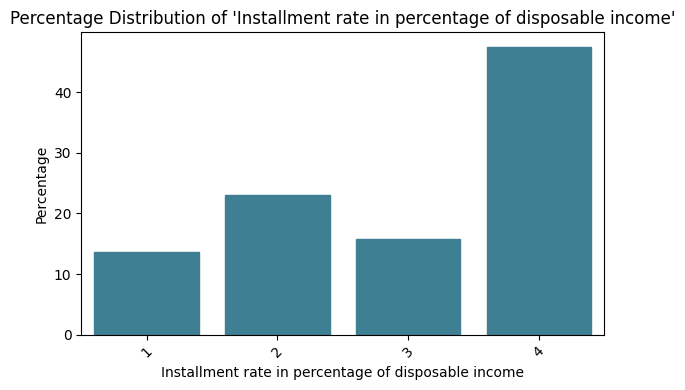

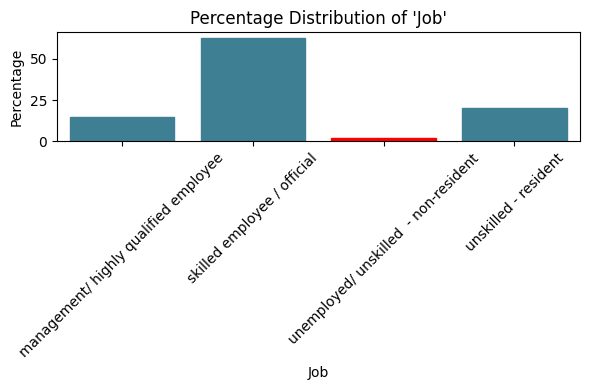

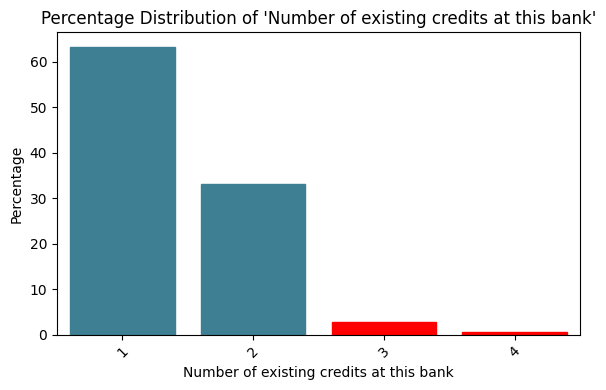

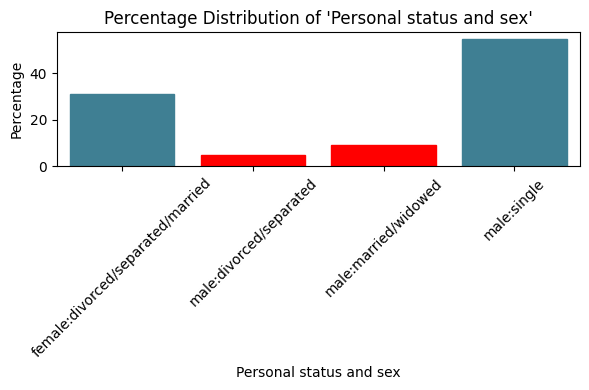

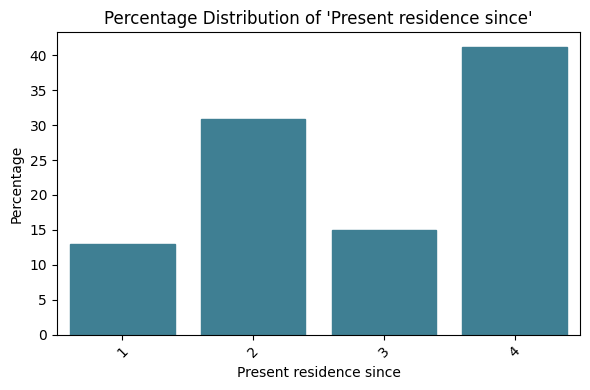

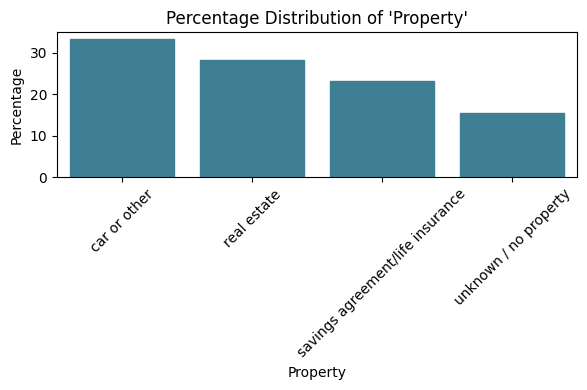

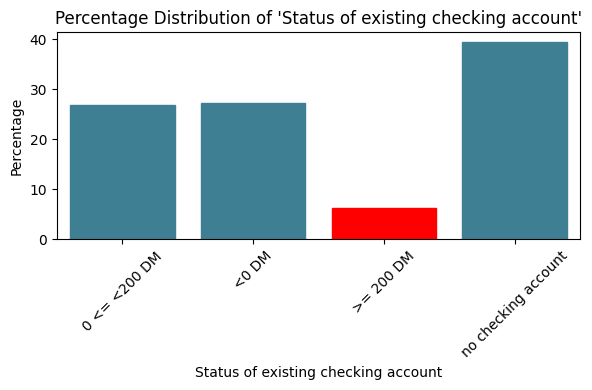

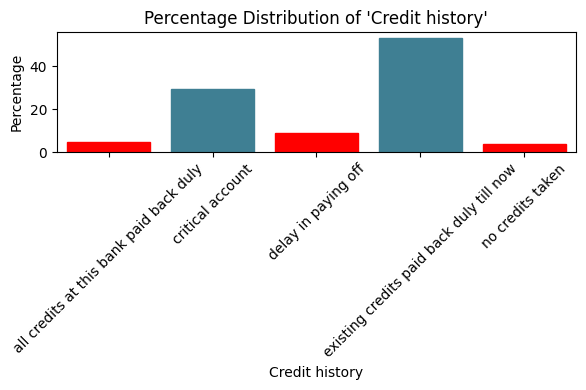

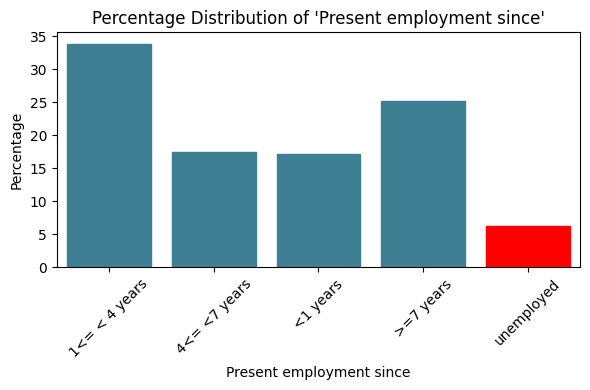

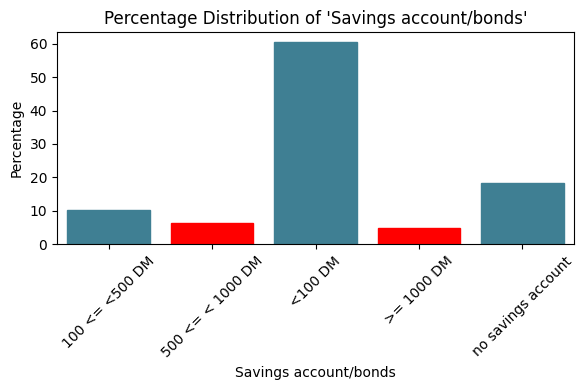

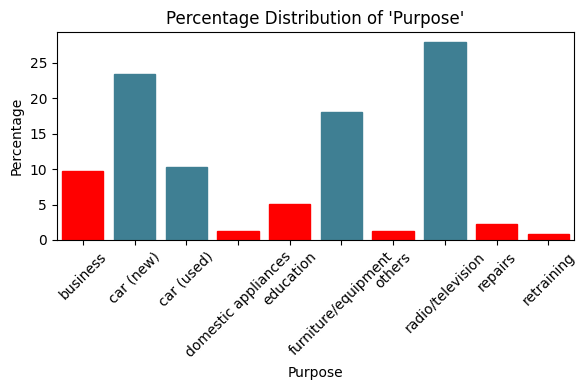

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Datapoints belonging to the categories having less than 10% are plotted in red
for key, columns in marginal_report_cluster.items():
    for col_name in sorted(columns):
        percentage_data = pd.crosstab(df[col_name], columns=["Percentage"]).apply(lambda r: (round((r / r.sum()) * 100, 2)), axis=0).reset_index()
        percentage_data.columns = [col_name, "Percentage"]

        # Visualize the percentage distribution with red for <10% and green for >=10%
        plt.figure(figsize=(6, 4))
        barplot = sns.barplot(x=col_name, y="Percentage", data=percentage_data)

        # Color bars based on the percentage values
        for bar, percent in zip(barplot.patches, percentage_data["Percentage"]):
            if percent < 10:
                bar.set_color('red')  # Below 10% in red
            else:
                bar.set_color('#3f7f93')  # 10% or above in green

        plt.title(f"Percentage Distribution of '{col_name}'")
        plt.xlabel(col_name)
        plt.ylabel("Percentage")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Data Attribute Refinement

We have conducted an analysis on our dataset and identified that many predictors are categorical with multiple levels. Some of these levels have limited observations. To improve the interpretability of the data, we have merged certain levels for specific attributes based on cell proportions provided in the one-way table.

## Other debtors / guarantors

Merged Levels:
- Co-applicant/guarantor
- None

## Other installment plans

Merged Levels:
- Bank/store
- None

## Job

Merged Levels:
- Employed
- Unemployed

## Number of existing credits at this bank

Merged Levels:
- One
- More than one

## Personal status and sex

Merged Levels:
- Male
- Female

## Status of existing checking account

Merged Levels:
- No checking account
- < 0 DM
- \> 0 DM

## Credit history

Merged Levels:
- All credit / existing credits paid back duly till now
- No credits taken
- Critical account/delay in paying off

## Savings account/bonds

Merged Levels:
- < 100 DM
- < 500 DM
- \> 500 DM
- No savings account

## Purpose

Merged Levels:
- New car
- Used car
- Home Related
- Other

## Present employment since

Merged Levels:
- < 1 year / unemployed
- 1 <= < 4 years
- 4 <= < 7 years
- \>= 7 years

These refined categories aim to provide a clearer and more consolidated representation of the data, enhancing the overall interpretability of the categorical attributes in our dataset.


In [ ]:
import pandas as pd

df = pd.read_csv("german_data_credit_cat.csv")

# Mapping dictionaries for categorical columns
number_of_credit = {1: 1, 2: 2, 3: 2, 4: 2}

status_of_existing_checking_account = {'A14': "no checking account", 'A11': "<0 DM", 'A12': ">0 DM", 'A13': ">0 DM"}

credit_history = {"A34": "critical account/delay in paying off", "A33": "critical account/delay in paying off",
                  "A32": "all credit / existing credits paid back duly till now",
                  "A31": "all credit / existing credits paid back duly till now", "A30": "no credits taken"}

purpose = {"A40": "car (new)", "A41": "car (used)", "A42": "Home Related", "A43": "Home Related", "A44": "Home Related",
           "A45": "Home Related", "A46": "others", 'A47': 'others', 'A48': 'others', 'A49': 'others', 'A410': 'others'}

saving_account = {"A65": "no savings account", "A61": "<100 DM", "A62": "<500 DM", "A63": ">500 DM", "A64": ">500 DM"}

present_employment = {'A75': ">=7 years", 'A74': "4<= <7 years", 'A73': "1<= < 4 years", 'A72': "<1 years", 'A71': "<1 years"}

personal_status_and_sex = {'A95': "female", 'A94': "male", 'A93': "male", 'A92': "female", 'A91': "male"}

other_debtors_guarantors = {'A101': "none", 'A102': "co-applicant/guarantor", 'A103': "co-applicant/guarantor"}

property_mapping = {'A121': "real estate", 'A122': "savings agreement/life insurance", 'A123': "car or other",
                    'A124': "unknown / no property"}

other_installment_plans = {'A143': "none", 'A142': "bank/store", 'A141': "bank/store"}

housing = {'A153': "for free", 'A152': "own", 'A151': "rent"}

job = {'A174': "employed", 'A173': "employed", 'A172': "unemployed", 'A171': "unemployed"}

telephone = {'A192': "yes", 'A191': "none"}

foreign_worker = {'A201': "yes", 'A202': "no"}

risk = {1: "Good Risk", 2: "Bad Risk"}

# Applying mappings to respective columns
df["Number of existing credits at this bank"] = df["Number of existing credits at this bank"].map(number_of_credit)
df["Status of existing checking account"] = df["Status of existing checking account"].map(status_of_existing_checking_account)
df["Credit history"] = df["Credit history"].map(credit_history)
df["Purpose"] = df["Purpose"].map(purpose)
df["Savings account/bonds"] = df["Savings account/bonds"].map(saving_account)
df["Present employment since"] = df["Present employment since"].map(present_employment)
df["Personal status and sex"] = df["Personal status and sex"].map(personal_status_and_sex)
df["Other debtors / guarantors"] = df["Other debtors / guarantors"].map(other_debtors_guarantors)
df["Property"] = df["Property"].map(property_mapping)
df["Other installment plans"] = df["Other installment plans"].map(other_installment_plans)
df["Housing"] = df["Housing"].map(housing)
df["Job"] = df["Job"].map(job)
df["Telephone"] = df["Telephone"].map(telephone)
df["foreign worker"] = df["foreign worker"].map(foreign_worker)
df["Risk"] = df["Risk"].map(risk)

After, merging following are the Levels and Proportions for the data


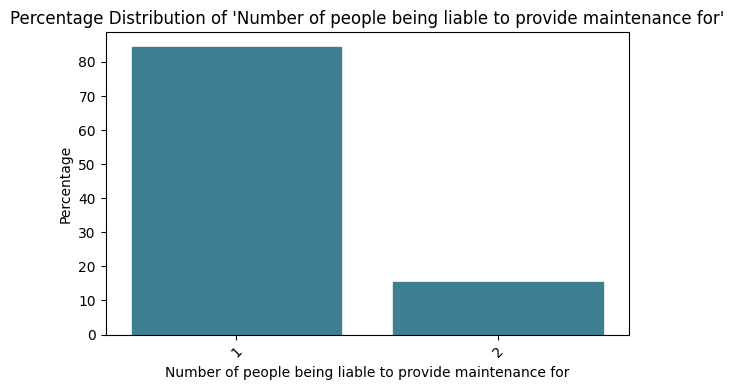

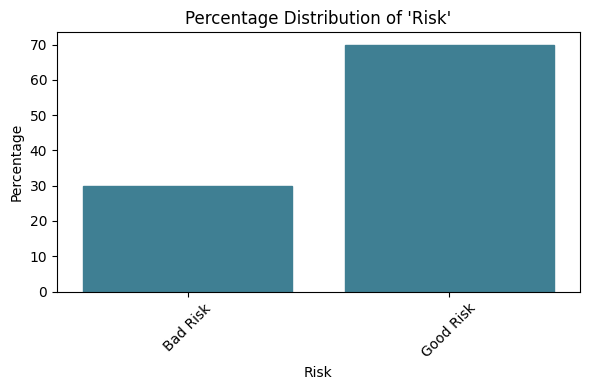

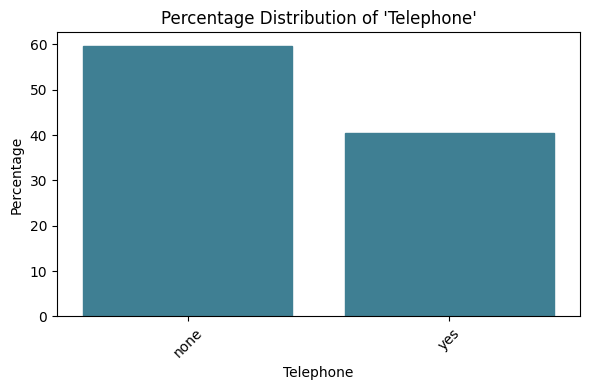

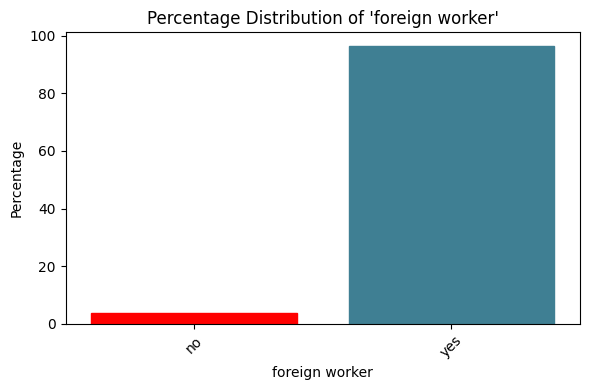

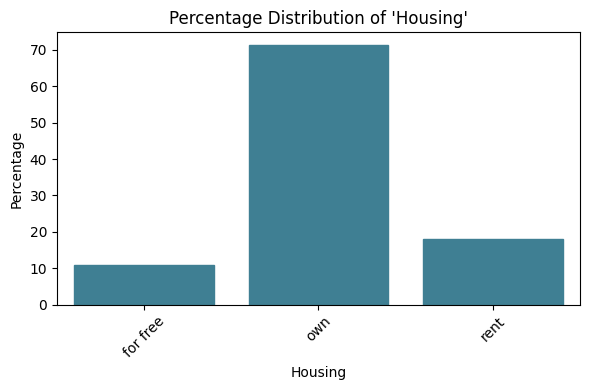

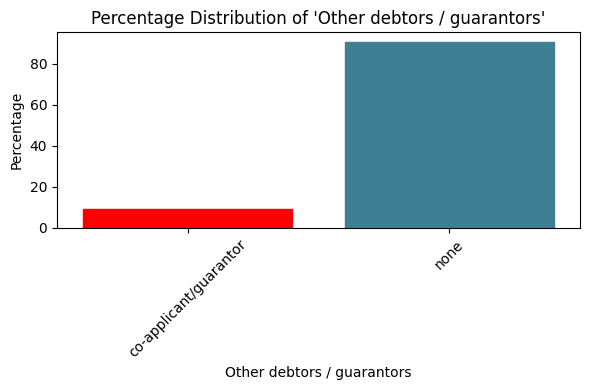

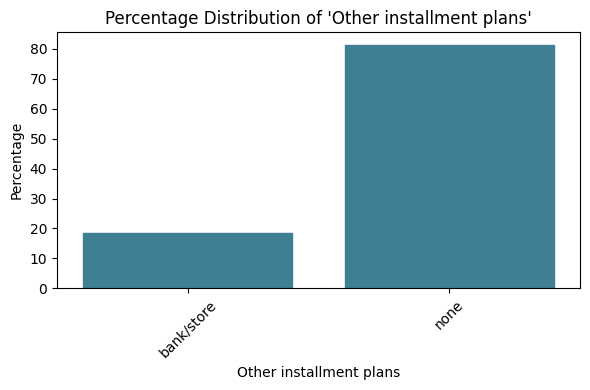

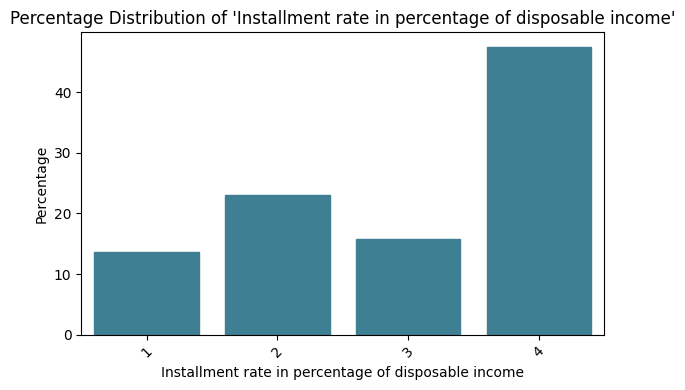

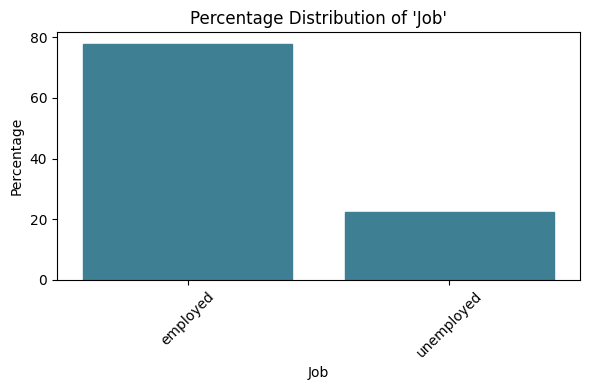

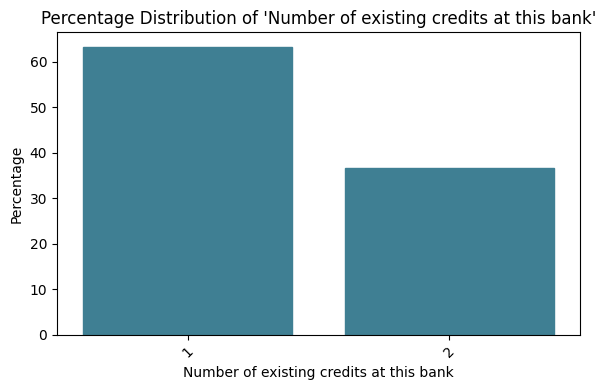

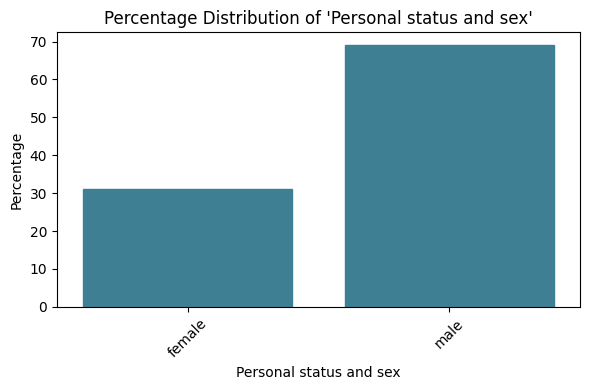

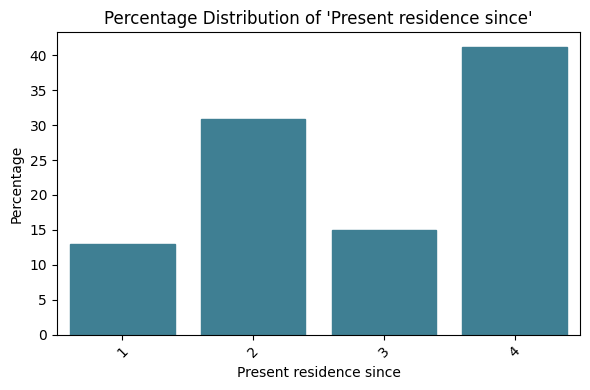

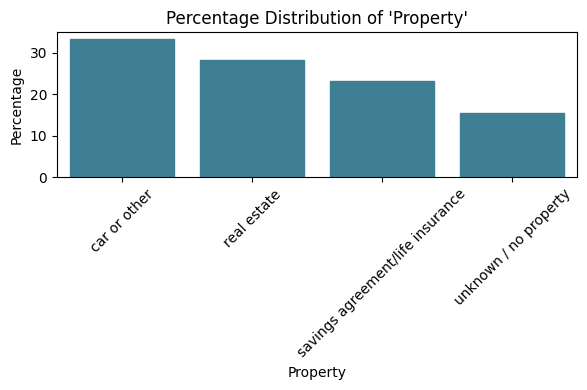

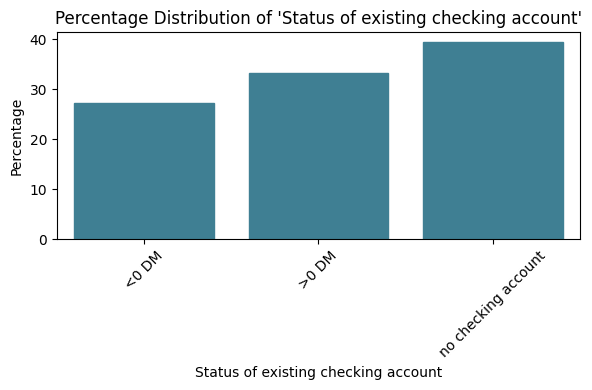

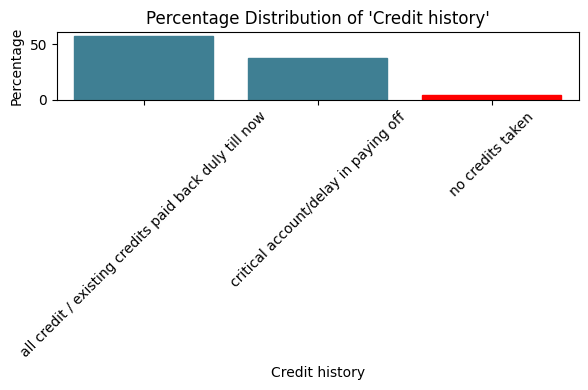

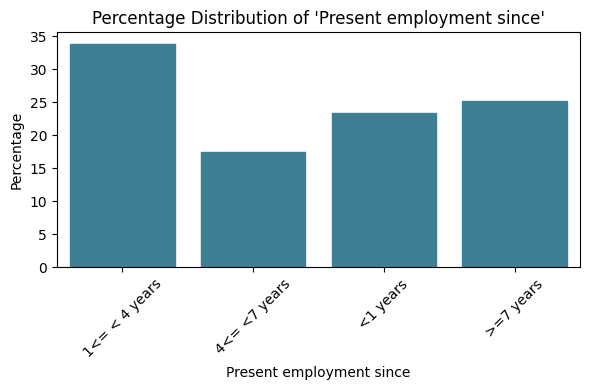

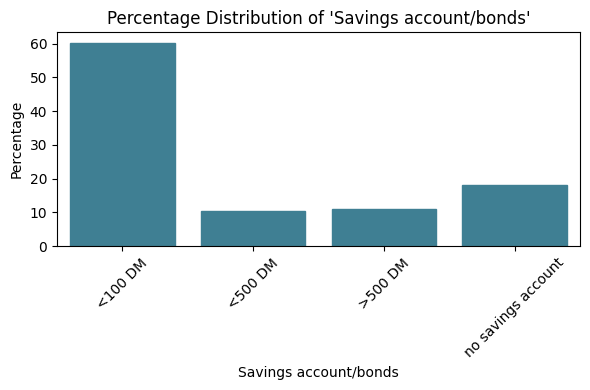

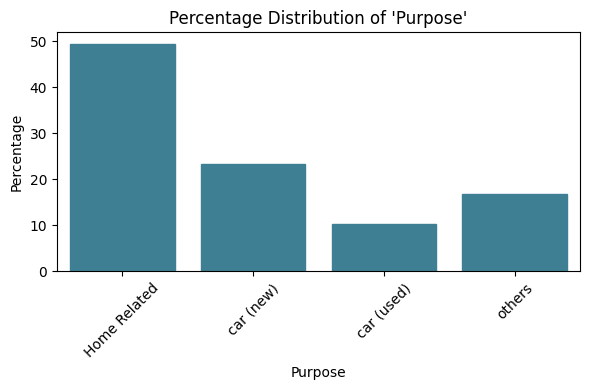

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Datapoints belonging to the categories having less than 10% are plotted in red
for key, columns in marginal_report_cluster.items():
    for col_name in sorted(columns):
        percentage_data = pd.crosstab(df[col_name], columns=["Percentage"]).apply(lambda r: (round((r / r.sum()) * 100, 2)), axis=0).reset_index()
        percentage_data.columns = [col_name, "Percentage"]

        # Visualize the percentage distribution with red for <10% and green for >=10%
        plt.figure(figsize=(6, 4))
        barplot = sns.barplot(x=col_name, y="Percentage", data=percentage_data)

        # Color bars based on the percentage values
        for bar, percent in zip(barplot.patches, percentage_data["Percentage"]):
            if percent < 10:
                bar.set_color('red')  # Below 10% in red
            else:
                bar.set_color('#3f7f93')  # 10% or above in green

        plt.title(f"Percentage Distribution of '{col_name}'")
        plt.xlabel(col_name)
        plt.ylabel("Percentage")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


### <a name="numerical-variable-stats">Numerical Variable</a>

Data consists of only 3 numerical features

In [ ]:
df[["Credit amount","Age in years","Duration in month"]].describe()

,Credit amount,Age in years,Duration in month
count,999.000000,999.000000,999.000000
mean,3273.362362,35.514515,20.917918
std,2823.365811,11.337487,12.055619
min,250.000000,19.000000,4.000000
25%,1368.500000,27.000000,12.000000
50%,2320.000000,33.000000,18.000000
75%,3972.500000,42.000000,24.000000
max,18424.000000,75.000000,72.000000


## <a name="eda">Exploratory Data Analysis (EDA)</a>

### <a name="categorical-eda">Categorical Variable</a>

We are visualizing the data for Good Risk and Bad Risk with respect to each category for all features



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

palette1 = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]
palette2 = ["#ff6b6b", "#ff7e67", "#ff8f56", "#ff9f56", "#ffa94d", "#ffb037", "#ffb037", "#ffcc2f"]

def choose_random_colors():
    return {
        "Good Risk": random.choice(palette1),
        "Bad Risk": random.choice(palette2)
    }
def visualize_distribution(attr):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=attr, hue="Risk", data=df, palette=choose_random_colors())
    ax.set_title(f"Distribution of '{attr}' for Risk Categories")
    ax.set_xlabel(attr)
    ax.set_ylabel("Count")
    plt.legend(title="Risk")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Status of existing checking account
In credit assessment, typical interpretations might be:

"0 DM" as no balance in the checking account.

">0 DM" as a positive balance.

"<0 DM" as an overdraft or negative balance, which might signal financial instability or higher risk.

Here DM refers to Debit Memo
According to the visualization, having 0 or more DM represents a better credit score than having <0 DM

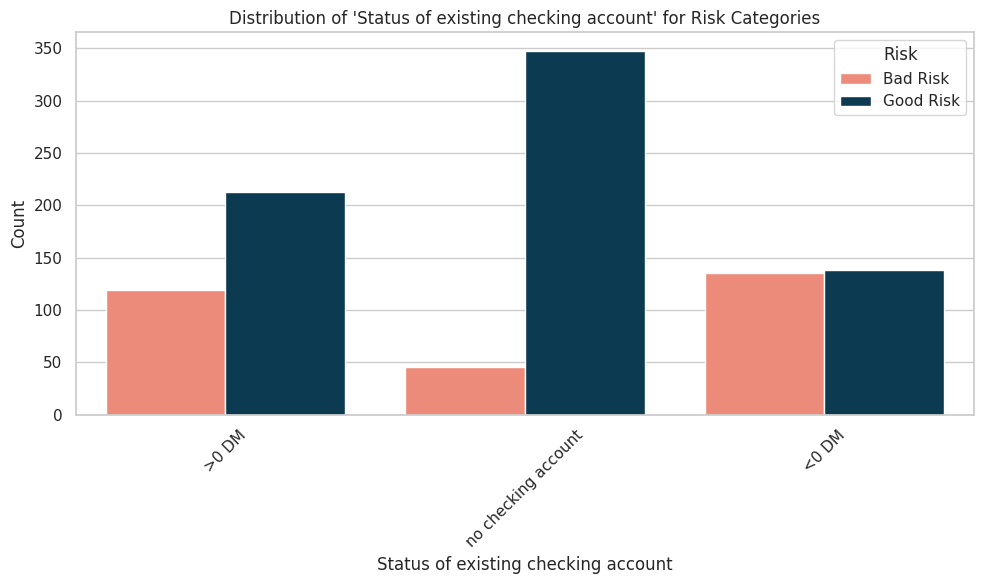

In [ ]:
visualize_distribution("Status of existing checking account")

#### Credit history
In credit assessment, a delay in paying credits, despite being a negative factor, might be perceived as relatively better than having no credit history at all for a few reasons:

Establishing Creditworthiness:

Delayed Payments: It indicates some credit activity and a track record, even if not perfect. It shows a willingness to repay, though not always on time.

No Credits Taken: Having no credit history might make it challenging for lenders to assess an individual's creditworthiness or reliability.

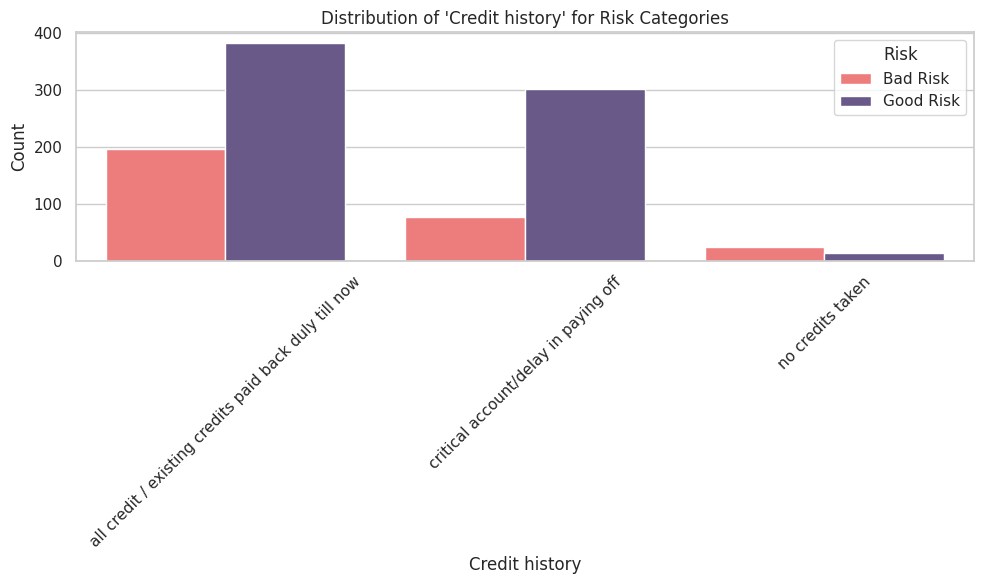

In [ ]:
visualize_distribution("Credit history")

#### Purpose
According to visualzation, there is less risk to provide loan if the purpose is buying property. This can be because:

Property purchase signifies stability and a long-term financial commitment, enhancing creditworthiness.

Owning property builds equity, showcases financial planning, and provides collateral for favorable lending terms.

Property ownership diversifies credit types, contributing to a positive credit mix and profile.


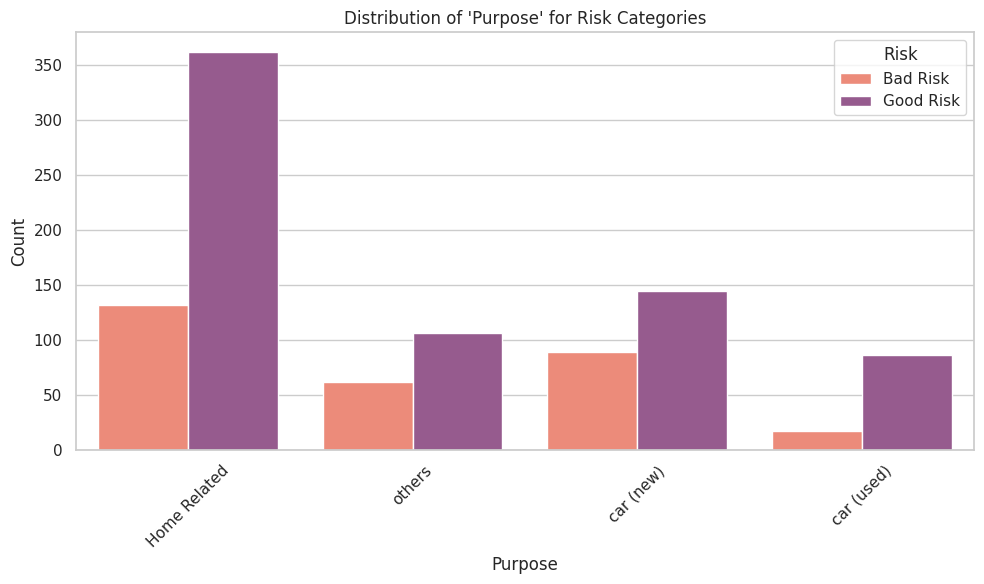

In [ ]:
visualize_distribution("Purpose")

#### Savings account/bonds
Savings account/bonds might indirectly influence credit scores positively, showcasing financial stability and potential capacity for loan repayment. However, it's not a direct determinant, and credit scores primarily reflect credit-related behavior rather than savings.

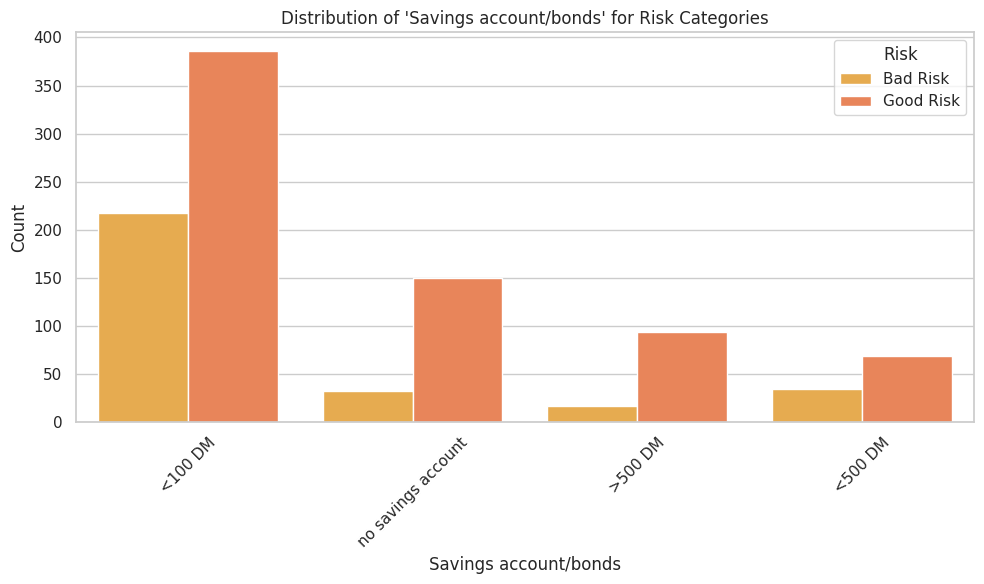

In [ ]:
visualize_distribution("Savings account/bonds")

#### Present employment since

The duration of present employment, particularly between 0 to 10 years, can indirectly impact credit scores, showing stability and steady income

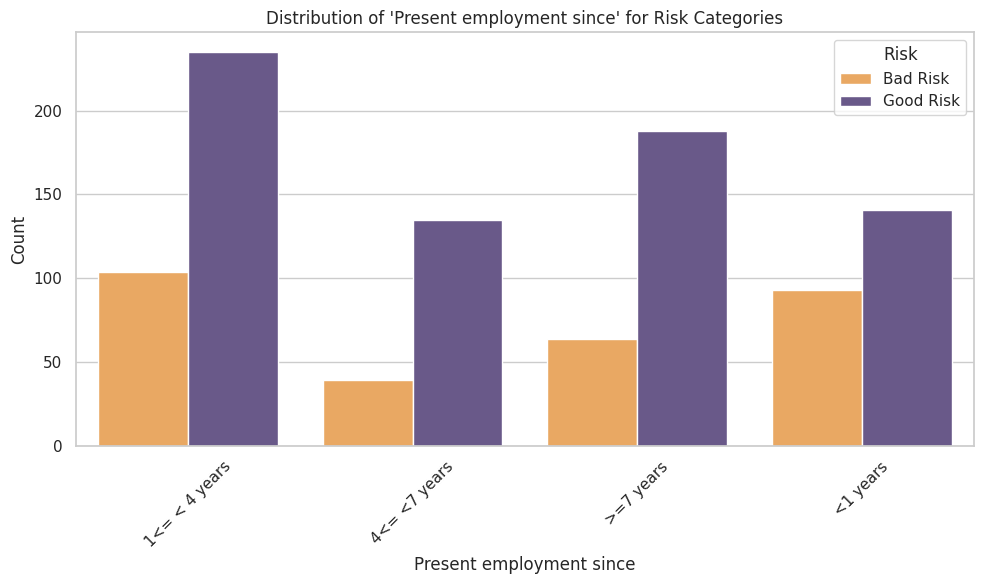

In [ ]:
visualize_distribution("Present employment since")

#### Installment rate in percentage of disposable income

The installment rate in relation to disposable income can significantly influence credit scores, with higher rates potentially impacting scores negatively due to increased risk of financial strain and missed payments. Lower rates suggest a manageable debt burden, potentially positively impacting credit scores and reflecting better financial stability.

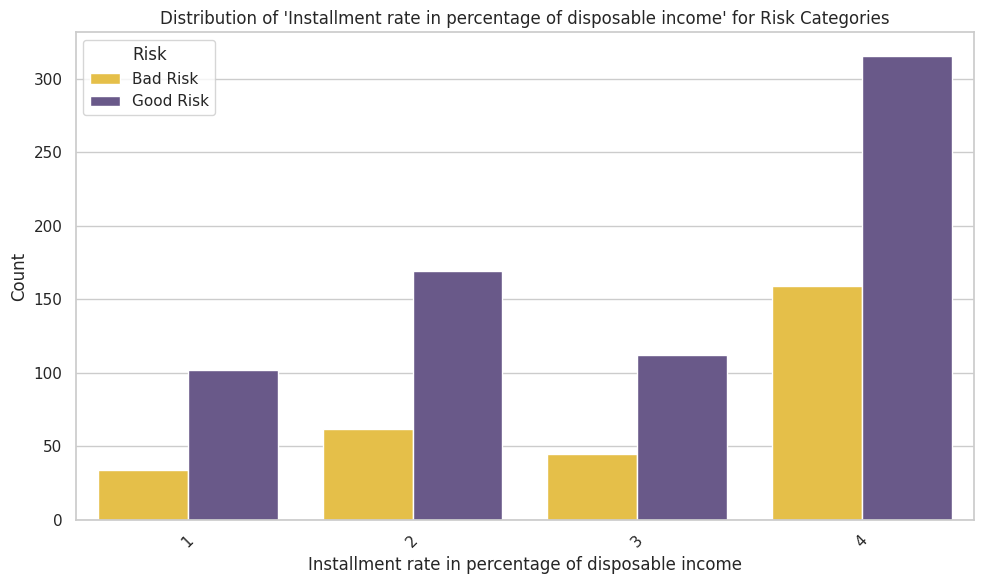

In [ ]:
visualize_distribution("Installment rate in percentage of disposable income")

#### Personal status and sex

Personal status and sex might have limited direct impact on credit scores as credit scoring primarily focuses on credit-related behavior like payment history and credit utilization. However, certain factors related to personal status, such as stability in relationships or financial responsibilities, might indirectly influence creditworthiness and, consequently, credit scores. Gender itself isn't a direct factor in credit scoring, as credit scores are based on financial behaviors rather than gender identity.

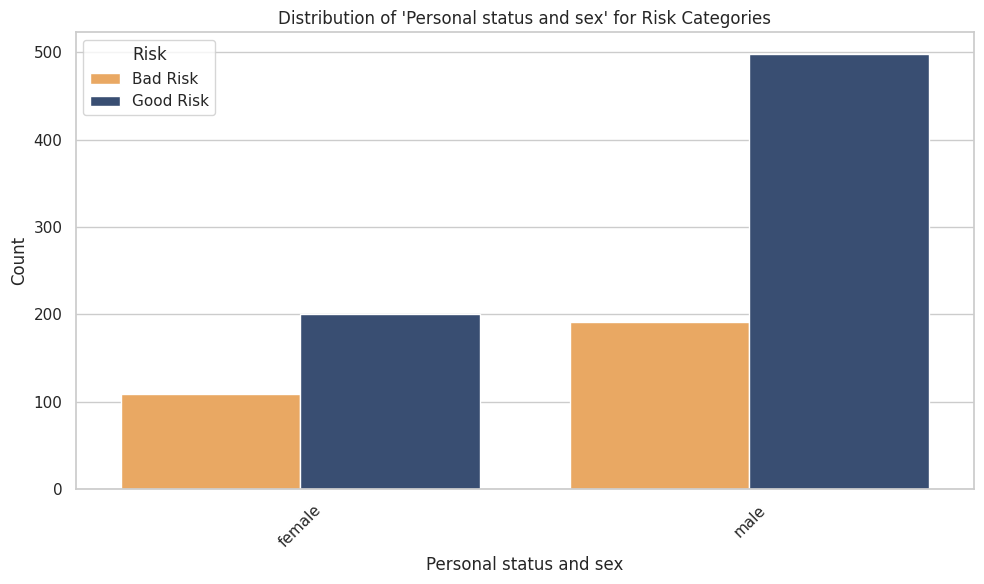

In [ ]:
visualize_distribution("Personal status and sex")

#### Other debtors / guarantors
The presence of other debtors or guarantors might impact credit risk, potentially mitigating it by sharing liability or exacerbating it if additional debtors pose a higher risk. Having a guarantor might positively influence risk assessment by providing assurance for loan repayment.
According to the visualization, having one is better than not having one

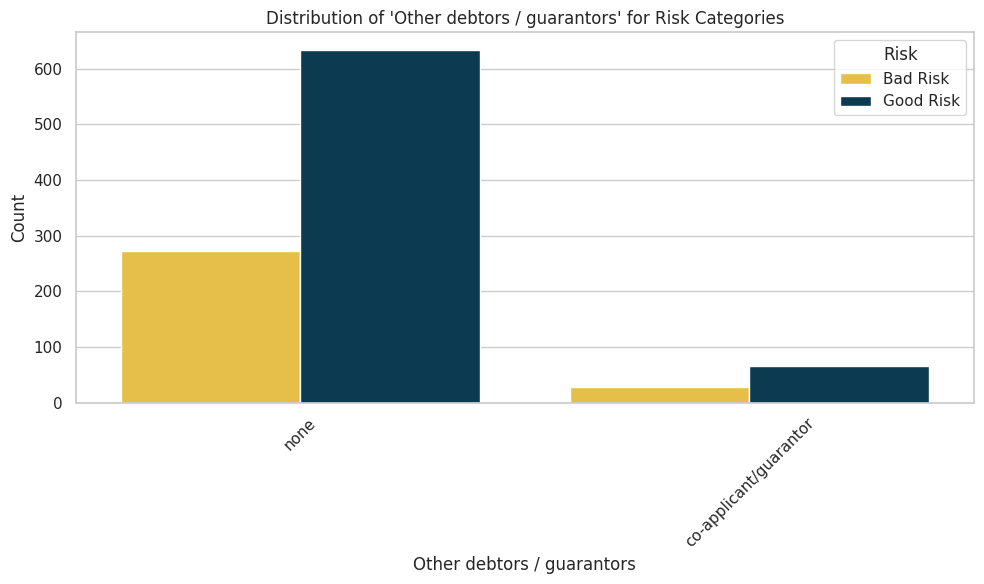

In [ ]:
visualize_distribution("Other debtors / guarantors")

#### Present residence since
Individuals with longer residence durations within the 0-5 years range might showcase stability, potentially positively impacting credit risk assessment. Longer residence duration often signals a settled lifestyle, contributing to a perception of reliability and stability, which can influence credit risk evaluation favorably.

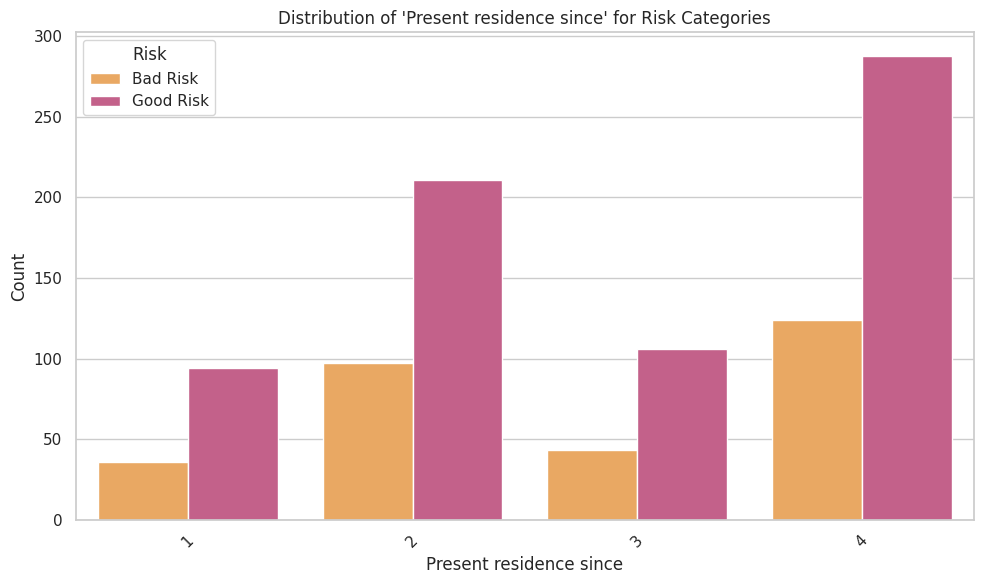

In [ ]:
visualize_distribution("Present residence since")

#### Property
Borrower's property
The borrower's property, such as real estate or assets used as collateral, can significantly impact credit risk assessment. Property ownership often provides security for lenders, potentially reducing risk perception and leading to more favorable terms or increased loan approval likelihood. Additionally, property ownership might signify stability and financial strength, positively influencing credit risk assessment.
Hence, according it visualization, it is very risky to provide loan to one with no or unknown property

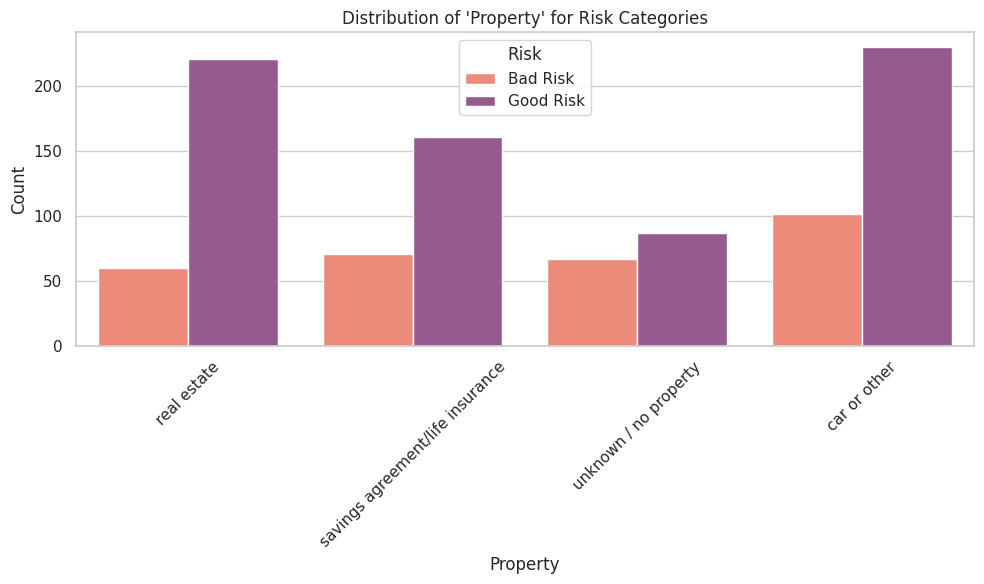

In [ ]:
visualize_distribution("Property")

#### Other installment plans
The presence of other installment plans, especially those tied to reputable institutions like banks or stores, might impact credit risk assessment positively. Such plans usually involve structured repayments, potentially reflecting responsible credit behavior and positively influencing risk evaluation

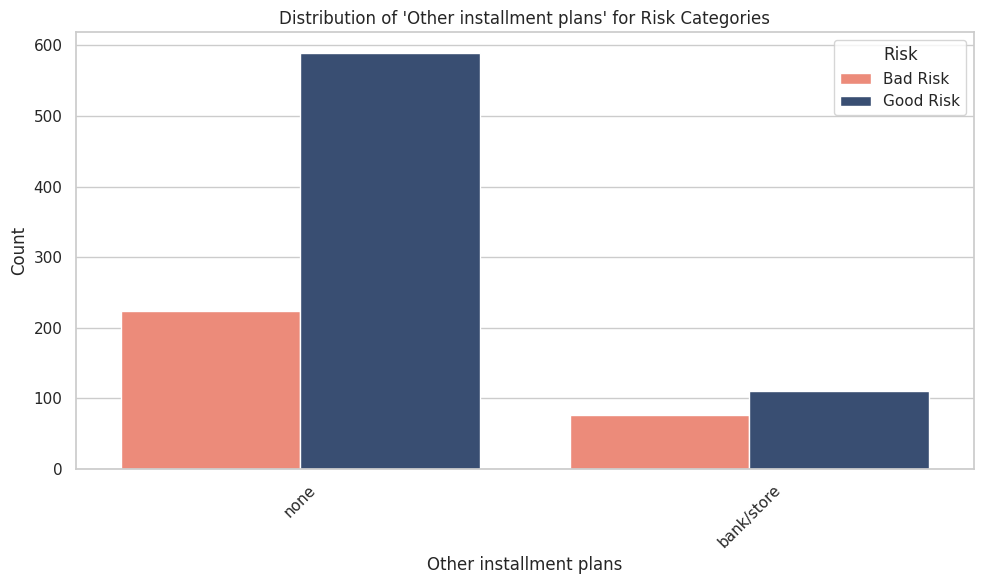

In [ ]:
visualize_distribution("Other installment plans")

#### Housing

Different housing statuses—owning, living rent-free, or renting—can influence credit risk assessment:

Property Ownership (Own/Free): Owning property or living rent-free might positively impact credit risk evaluation, showcasing stability, responsibility, and financial strength.

Renting: While renting doesn't inherently impact credit risk negatively, it might provide fewer assurances compared to property ownership, potentially influencing risk assessment neutrally

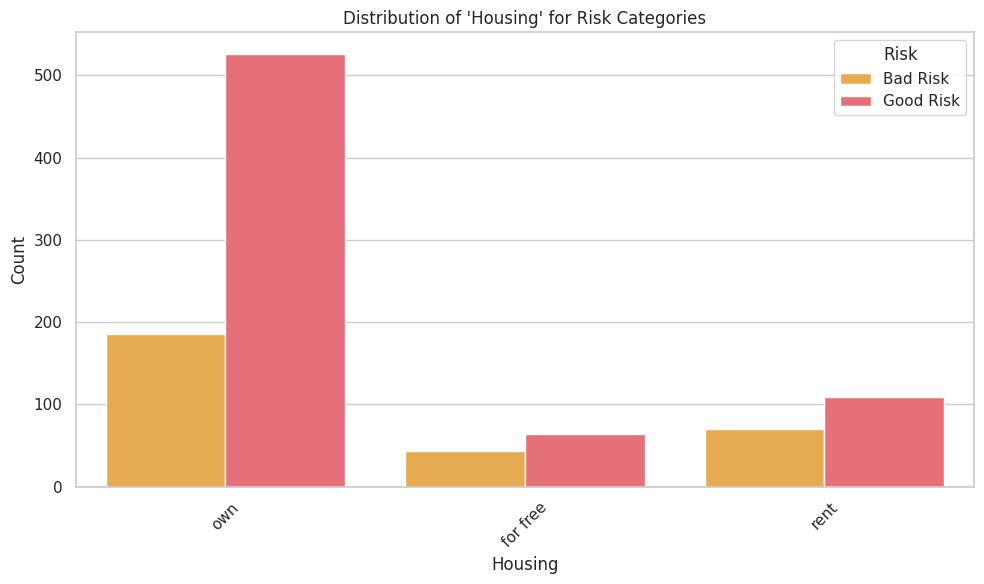

In [ ]:
visualize_distribution("Housing")

#### Number of existing credits at this bank

The number of existing credits at a bank can influence credit risk assessment:

Higher Number of Credits: A higher count might suggest a higher debt load, potentially impacting credit risk negatively by signaling an increased risk of overextension or difficulty in managing multiple obligations.

Lower Number of Credits: Fewer credits might imply a lower debt load, potentially positively influencing credit risk assessment by indicating manageable financial commitments.

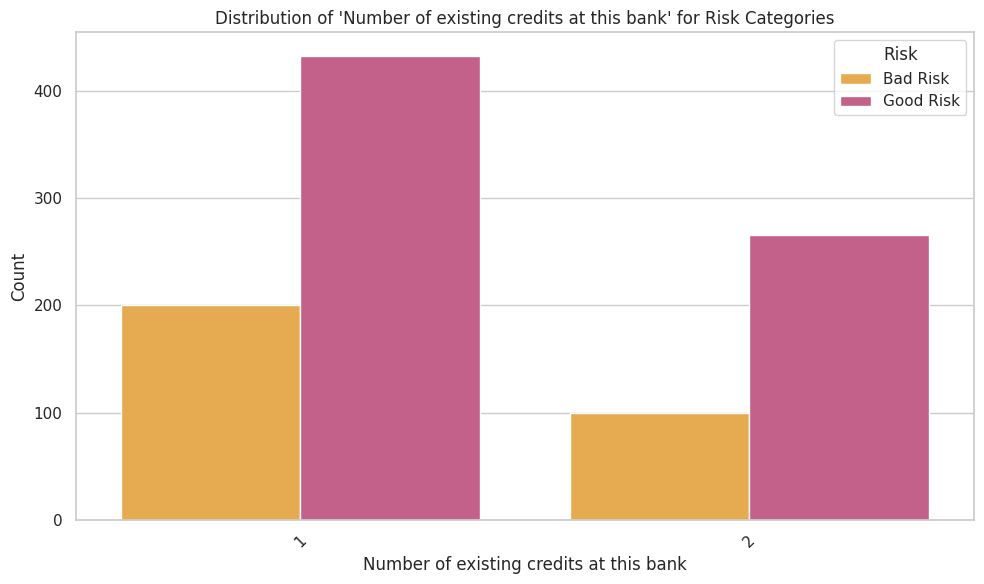

In [ ]:
visualize_distribution("Number of existing credits at this bank")

#### Number of people being liable to provide maintenance for

The number of people liable for maintenance obligations doesn't typically have a direct impact on credit risk assessment. This information generally isn't considered in traditional credit scoring models, which primarily focus on credit-related behaviors like payment history, credit utilization, and debt-to-income ratio. Instead, credit risk assessment tends to concentrate on an individual's financial behaviors and obligations directly tied to credit and loan repayments.


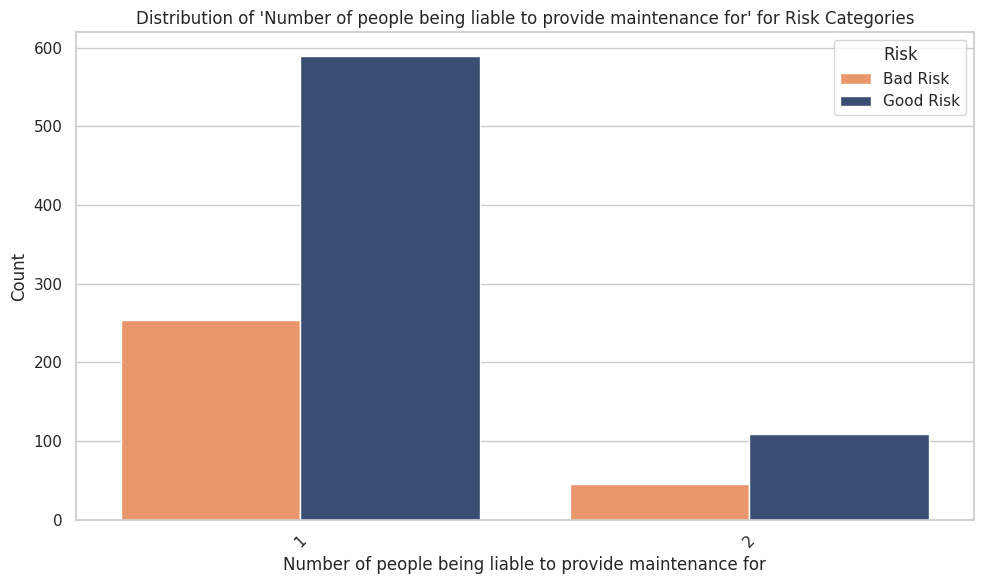

In [ ]:
visualize_distribution("Number of people being liable to provide maintenance for")

#### Foreign worker

Foreign worker status may have a limited direct impact on credit risk assessment. Credit risk is typically evaluated based on financial behaviors, credit history, and other relevant factors rather than employment status or nationality.


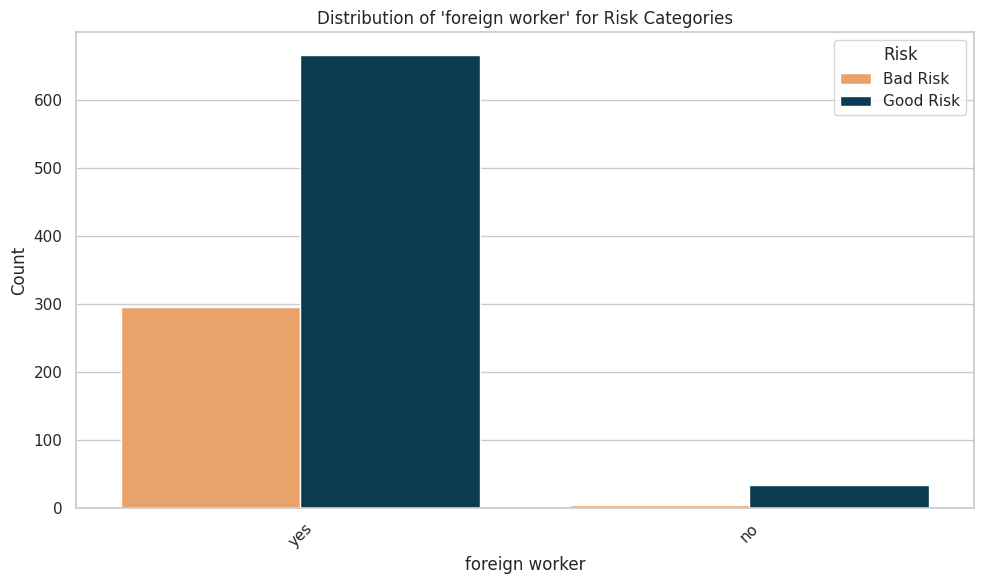

In [ ]:
visualize_distribution("foreign worker")

#### Duration in Month

The duration in months might indirectly impact credit scores:

Longer Credit Duration: Maintaining credit accounts for longer durations can positively influence credit scores, showcasing a longer credit history and potentially demonstrating responsible credit management.

Shorter Credit Duration: Limited credit history due to a shorter duration might have a neutral impact or a slightly negative effect on credit scores, as it provides fewer data points for assessing creditworthiness.

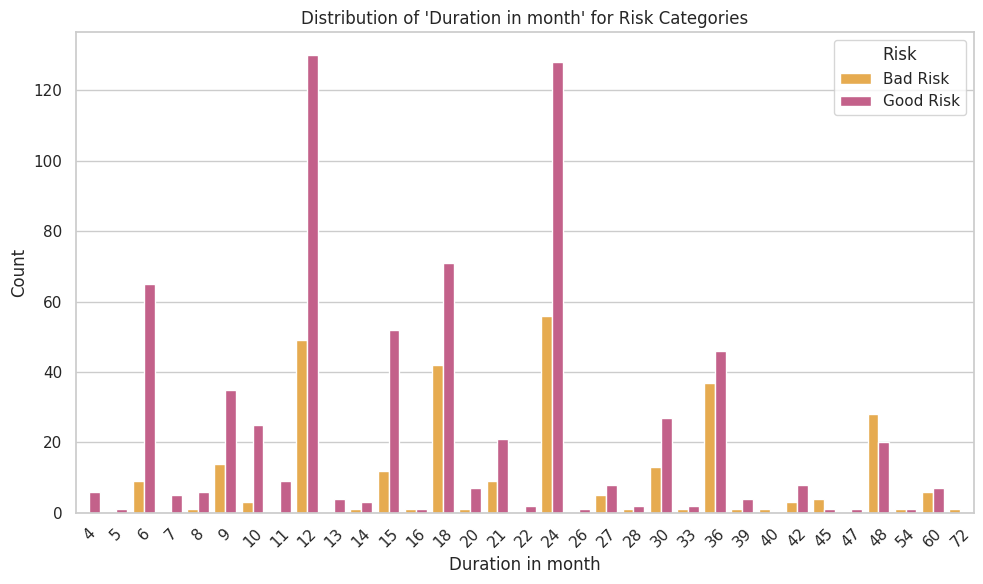

In [ ]:
visualize_distribution("Duration in month")

#### Age category
We are converting age to a categorical variable based on range, for better visualization

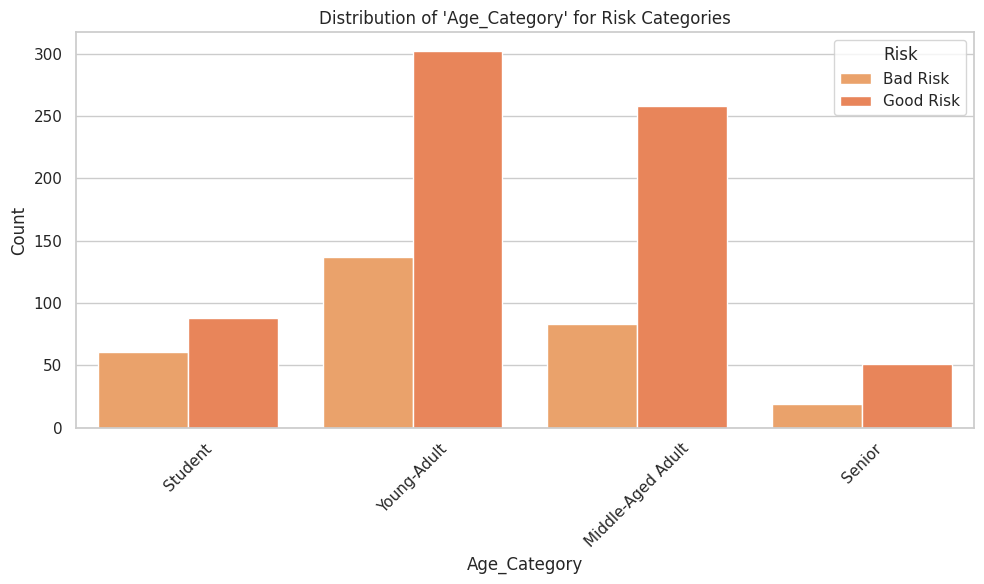

In [ ]:
age_interval = [18, 24, 35, 55, 120]
age_category = ['Student', 'Young-Adult', 'Middle-Aged Adult', 'Senior']
df["Age_Category"] = pd.cut(df["Age in years"], age_interval, labels=age_category)
visualize_distribution("Age_Category")

### <a name="numerical-eda">Numerical Variables</a>

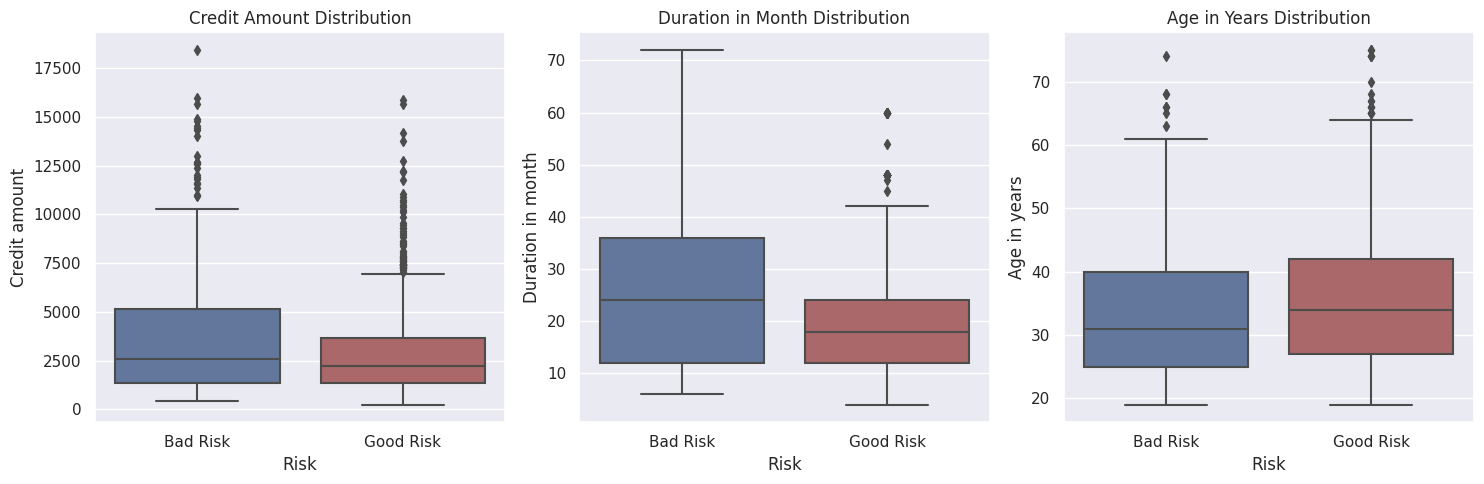

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

#Visualizing numerical features
f, axes = plt.subplots(1, 3, figsize=(15, 5))

# Box plot for Credit amount
sns.boxplot(y=df["Credit amount"], x=df["Risk"], orient='v', ax=axes[0], palette=["#5975A4", "#B55D60"])
axes[0].set_title("Credit Amount Distribution")

# Box plot for Duration in month
sns.boxplot(y=df["Duration in month"], x=df["Risk"], ax=axes[1], palette=["#5975A4", "#B55D60"])
axes[1].set_title("Duration in Month Distribution")

# Box plot for Age in years
sns.boxplot(y=df["Age in years"], x=df["Risk"], orient='v', ax=axes[2], palette=["#5975A4", "#B55D60"])
axes[2].set_title("Age in Years Distribution")

plt.tight_layout()
plt.show()

### <a name="feature-selection">Feature Selection</a>


##Data Attribute Refinement using P-values

In our effort to improve modelling, we have employed statistical analysis through the use of p-values. By conducting hypothesis tests, we aim to identify features that significantly contribute to the predictive model.

P-values indicate the probability of obtaining the observed results (or more extreme) under the assumption that the null hypothesis is true. A low p-value (typically less than 0.05) suggests that the observed relationship between the predictor and the response is statistically significant.

The criteria for feature selection involve assessing p-values, and features with p-values less than 0.05 are considered statistically significant. Consequently, features failing to meet this threshold are selectively dropped from the dataset. This meticulous approach ensures that the remaining features hold higher statistical relevance, contributing meaningfully to the overall predictive accuracy of our model.

In [ ]:
#p-values less than 0.05 are marked red, and will be dropped
def style_stats_specific_cell(x):

    color_thresh = 'background-color: lightpink'

    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    for r in range(0,rows_number):
        try:
            val=(x.iloc[r, 1])
            if val>0.05:
                df_color.iloc[r, 1]=color_thresh
        except:
            pass
    return df_color

In [ ]:
def calculate_categorical_significance(df, column_names):
    statistical_significance = []
    for attr in column_names:
        data_count = pd.crosstab(df[attr], df["Risk"]).reset_index()
        obs = np.asarray(data_count[["Bad Risk", "Good Risk"]])
        chi2, p, dof, expected = stats.chi2_contingency(obs)
        statistical_significance.append([attr, round(p, 6)])

    statistical_significance = pd.DataFrame(statistical_significance, columns=["Attribute", "P-value"])
    return statistical_significance

def calculate_continuous_significance(df, column_names):
    statistical_significance = []
    good_risk_df = df[df["Risk"] == "Good Risk"]
    bad_risk_df = df[df["Risk"] == "Bad Risk"]

    for attr in column_names:
        statistic, p = stats.f_oneway(good_risk_df[attr].values, bad_risk_df[attr].values)
        statistical_significance.append([attr, round(p, 6)])

    statistical_significance = pd.DataFrame(statistical_significance, columns=["Attribute", "P-value"])
    return statistical_significance

# Usage:
column_names_cat_stats = ["Status of existing checking account", "Credit history", "Purpose",
                          "Savings account/bonds", "Present employment since",
                          "Installment rate in percentage of disposable income", "Personal status and sex",
                          "Other debtors / guarantors", "Present residence since", "Property",
                          "Other installment plans", "Housing", "Number of existing credits at this bank",
                          "Job", "Number of people being liable to provide maintenance for", "Telephone",
                          "foreign worker"]

categorical_significance = calculate_categorical_significance(df, column_names_cat_stats)
display(categorical_significance.style.apply(style_stats_specific_cell, axis=None))

column_names_cont_stats = ["Credit amount", "Age in years", "Duration in month"]
continuous_significance = calculate_continuous_significance(df, column_names_cont_stats)
display(continuous_significance.style.apply(style_stats_specific_cell, axis=None))

,Attribute,P-value
0,Status of existing checking account,0.000000
1,Credit history,0.000000
2,Purpose,0.000052
3,Savings account/bonds,0.000000
4,Present employment since,0.000450
5,Installment rate in percentage of disposable income,0.134102
6,Personal status and sex,0.021524
7,Other debtors / guarantors,1.000000
8,Present residence since,0.861344
9,Property,0.000032


,Attribute,P-value
0,Credit amount,0.000001
1,Age in years,0.004559
2,Duration in month,0.000000


<a name="selected-feature">Selected Features after computing p-values</a>: Status of existing checking account, Credit history, Purpose,Savings account/bonds, Present employment since, Personal status and sex, Property, Other installment plans, Housing, foreign worker, Credit amount, Age in years, Duration in month

In [ ]:
attr_significant=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker",\
"Credit amount","Age in years","Duration in month"]
target_variable=["Risk"]
df=df[attr_significant+target_variable]

## Correlation Matrix

<ipython-input-34-39e6a4b74d78>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = df.corr()


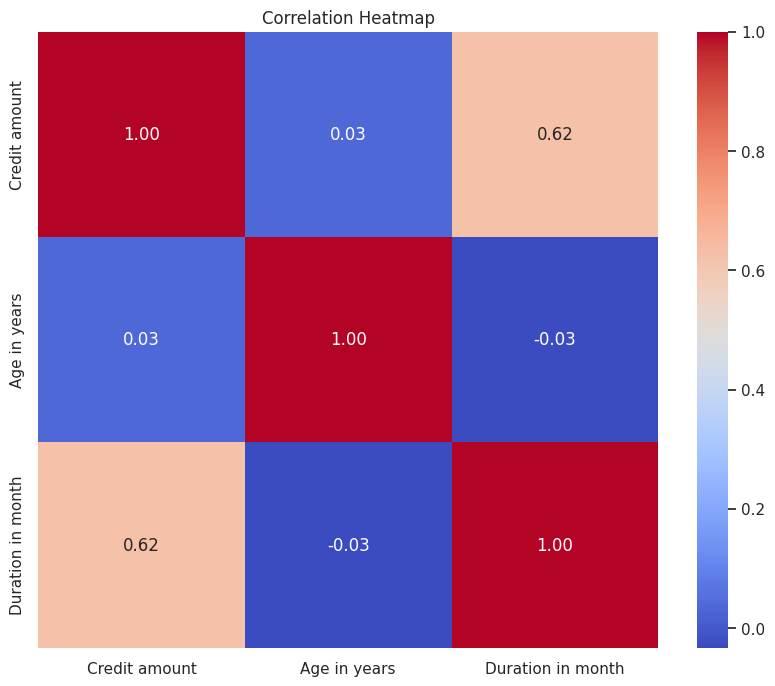

In [ ]:
cov_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

 Given the high corelation observed between the "Credit amount" and "Duration in month" features in the covariance matrix of the numerical features, we have decided to address multicollinearity by introducing a new feature named "Credit Per Month." This new feature represents the ratio of the credit amount to the duration in months. Consequently, to mitigate redundancy and enhance the model's interpretability, we are removing both the "Credit amount" and "Duration in month" features from the dataset.

In [ ]:
# Adding a new column "Credit per Month"
df["Credit per Month"] = df["Credit amount"] / df["Duration in month"]
df.drop(["Credit amount", "Duration in month"], axis=1, inplace=True)

<a name="data-pre">__Using One Hot encoding to represent categorical features for better modelling__</a>

In [ ]:
col_cat_names = [
    "Status of existing checking account", "Credit history", "Purpose",
    "Savings account/bonds", "Present employment since",
    "Personal status and sex", "Property", "Other installment plans",
    "Housing", "foreign worker"
]

# One-hot encode categorical features and merge with the original DataFrame
df = pd.get_dummies(df, columns=col_cat_names, prefix=col_cat_names)

# Convert the target variable into numeric
risk_mapping = {"Good Risk": 1, "Bad Risk": 0}
df["Risk"] = df["Risk"].map(risk_mapping)

In [ ]:
#view of the dataset after preprocessing
df.head()

,Age in years,Risk,Credit per Month,Status of existing checking account_<0 DM,Status of existing checking account_>0 DM,Status of existing checking account_no checking account,Credit history_all credit / existing credits paid back duly till now,Credit history_critical account/delay in paying off,Credit history_no credits taken,Purpose_Home Related,Purpose_car (new),Purpose_car (used),Purpose_others,Savings account/bonds_<100 DM,Savings account/bonds_<500 DM,Savings account/bonds_>500 DM,Savings account/bonds_no savings account,Present employment since_1<= < 4 years,Present employment since_4<= <7 years,Present employment since_<1 years,Present employment since_>=7 years,Personal status and sex_female,Personal status and sex_male,Property_car or other,Property_real estate,Property_savings agreement/life insurance,Property_unknown / no property,Other installment plans_bank/store,Other installment plans_none,Housing_for free,Housing_own,Housing_rent,foreign worker_no,foreign worker_yes
0,22,0,123.979167,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
1,49,1,174.666667,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1
2,45,1,187.666667,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1
3,53,0,202.916667,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1
4,35,1,251.527778,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1
